# Analisando Dados - Roteiro

### Base Library

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data import

In [2]:
# Pelo Pandas Data Frame
"""
df = pd.DataFrame(
    data=xxxx,
    index=xxxx,
    columns=xxxx,
)
"""

'\ndf = pd.DataFrame(\n    data=xxxx,\n    index=xxxx,\n    columns=xxxx,\n)\n'

In [3]:
# Utilizando Dataset do Seaborn
df = sns.load_dataset('titanic')

### View
**info()**

**head()** - fast view



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


### Analyses

**corr()** - Good for correlate parameters

**sns.heatmap + df.isnull()** - NaN view

**sns.boxplot()** - good to see the quartis and outliers

**describe()** - good for use the max,min,quartis etc

In [6]:
# Correlations
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


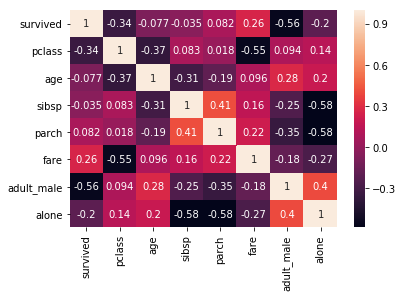

In [7]:
# Better way to use corr()
sns.heatmap(
    df.corr(),
    annot = True,
);

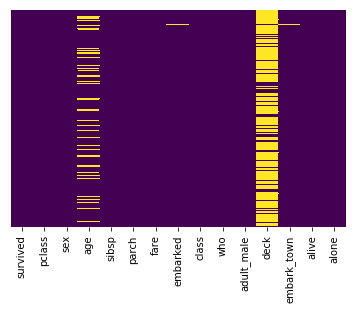

In [8]:
sns.heatmap(
    df.isnull(),
    yticklabels = False,
    cbar = False,
    cmap= 'viridis'
);

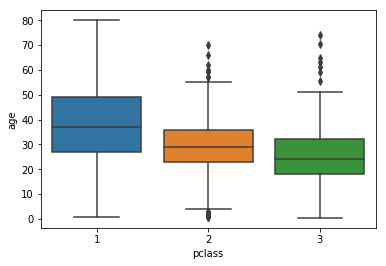

In [9]:
sns.boxplot(
    x = 'pclass',
    y='age',
    data = df
);

In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [12]:
MIN= df['age'].describe()['min']#Min
q1 = df['age'].describe()['25%']#Q1
q2 = df['age'].describe()['50%']#Q2MEDIANA
q3 = df['age'].describe()['75%']#Q3
MAX= df['age'].describe()['max']#Max


### Manipulations 

**drop() / remove** - remove some rows unnecessary 

**dropna()** - remove only NaN (lazy way, you can lost good informations)

**df [ df['age'] > 10 ]** - filtring some informations by the logic

**df.apply() / df.applymap()** - trought the above grafics (heatmap and boxplot) some times you need to replace elements or outliers

**pd.get_dummies()** - transforme all strings in numbers!

In [13]:
# REMOVE / DROP - When use????
# Exemplo - imagine this datas
x = pd.DataFrame(
    data = {
        "a":[1,2,3],
        "b":[1,2,3],
        "c":[1,2,3],
        "d":[1,2,3],
        "e":[1,2,3],
    }
)
x

,a,b,c,d,e
0,1,1,1,1,1
1,2,2,2,2,2
2,3,3,3,3,3


In [14]:
# I wanna get only the col A and B
x1 = x[['a','b']]
x1

,a,b
0,1,1
1,2,2
2,3,3


In [15]:
# Now I wanna remove only the col A
x2 = x[['b','c','d','e']]
# Okay... but if you had a lot of col
# it wasn't the better way... is easer 
# remove instead of get one by one.

# Right way
x2 = x.drop('a',axis=1)
x2

,b,c,d,e
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3


In [16]:
df.info()
# Veja que no 'deck' temos muitos null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [17]:
# Way 1 - removing in the main df
#df.dropna('deck',axis=1,inplace=True)

In [18]:
# Way 2 - creating new df
df_without_null = df.dropna()

In [19]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
survived       182 non-null int64
pclass         182 non-null int64
sex            182 non-null object
age            182 non-null float64
sibsp          182 non-null int64
parch          182 non-null int64
fare           182 non-null float64
embarked       182 non-null object
class          182 non-null category
who            182 non-null object
adult_male     182 non-null bool
deck           182 non-null category
embark_town    182 non-null object
alive          182 non-null object
alone          182 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [20]:
# pick up only the 'Age' with 'pclass' 1
df['age'][ df['pclass'] == 1 ].head(2)

1    38.0
3    35.0
Name: age, dtype: float64

In [21]:
# Doing the mean()
df['age'][ df['pclass'] == 1 ].mean()

38.233440860215055

In [22]:
# Transforme String in Numbers
df_dummies = pd.get_dummies(
    df,
    drop_first=False
)
df_dummies

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
5,0,3,NaN,0,0,8.4583,True,True,0,1,...,0,0,0,0,0,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,True,True,0,1,...,0,0,1,0,0,0,0,1,1,0
7,0,3,2.0,3,1,21.0750,False,False,0,1,...,0,0,0,0,0,0,0,1,1,0
8,1,3,27.0,0,2,11.1333,False,False,1,0,...,0,0,0,0,0,0,0,1,0,1
9,1,2,14.0,1,0,30.0708,False,False,1,0,...,0,0,0,0,0,1,0,0,0,1


#### exemple

In [23]:
# Exemple- creating a function to replace
# some NaN Age values by the mean() 
# of the Age per Pclass

def f(row):
    Age = row[0]
    Pclass = row[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return df['age'][ df['pclass'] == 1 ].mean()
        if Pclass == 2:
            return df['age'][ df['pclass'] == 2 ].mean()
        if Pclass == 3:
            return df['age'][ df['pclass'] == 3 ].mean()
            
    return Age
    

In [24]:
# Applying the function
df['age'] = df[['age','pclass']].apply(f,axis=1)

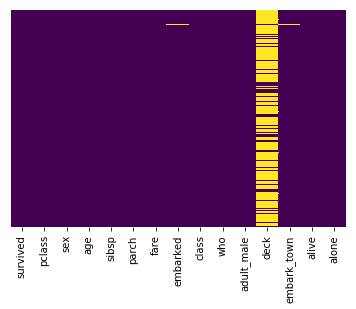

In [25]:
# checking
sns.heatmap(
    df.isnull(),
    yticklabels = False,
    cbar = False,
    cmap= 'viridis'
);
# Dont have more NaN in 'age'

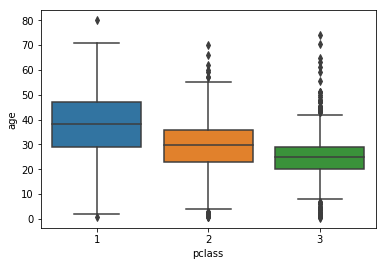

In [26]:
# Checking the outliers
sns.boxplot(
    x = 'pclass',
    y='age',
    data = df
);

### Separate datas Train and Test

In [27]:
"""
x_train,x_test,y_train,y_test =train_test_split(
    x =,
    y =,
    test_size = 0.2 #20% reserved to test
)
x_train.shape # always check!!!
y_train.shape # always check!!!
x_test.shape # always check!!!
y_test.shape # always check!!!
""";

### Choose the model

...